### レポート3
1. 顔検知結果から，トリミングを使って画像だけを表示する

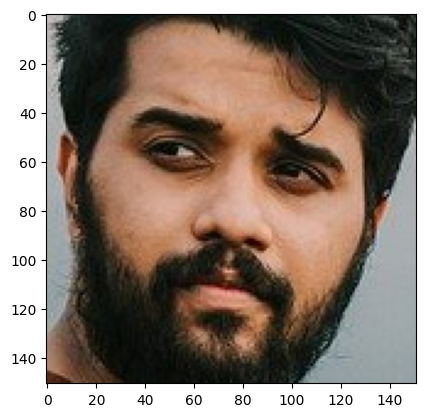

In [10]:
import cv2
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

x = result[0][0]
y = result[0][1]
w = result[0][2]
h = result[0][3]
face = image[y:y+h, x:x+w]
plt.imshow(face)
plt.show()

2. 顔検知結果から，マスク画像を作成し，マスク合成で画像だけを表示する

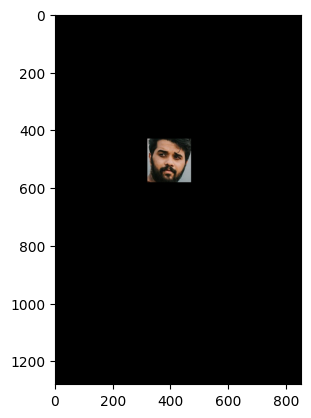

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# カスケード型分類器の読み込み
cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# データ読み込み
image = cv2.imread("person-sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 読み込んだデータを分類器に適用
result = cascade.detectMultiScale(image)

x = result[0][0]
y = result[0][1]
w = result[0][2]
h = result[0][3]

height = image.shape[0] # 縦ピクセル数
width = image.shape[1] # 横ピクセル数
mask = np.full((height, width, 3), 0, np.uint8) # マスク画像の黒背景
cv2.rectangle(mask, (x, y, w, h), (255, 255, 255), -1) # 白抜き
face = cv2.bitwise_and(image, mask) # マスク処理を行う
plt.imshow(face)
plt.show()